# Linear Regression - Example
Scikit-learn is a free machine learning library for python. We can easily implement linear regression with Scikit-learn using the LinearRegression class. 
After creating a linear regression object, we can obtain the line that best fits our data by calling the fit method.
However, first we will learn how to implement a simple linear regression from scratch using two different approaches: 
- OLS
- Gradient Descent

You will see this is funnier and more effective to learn a model!

In [12]:
# Libraries to import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the weight and height dataset
You can find the dataset in the following [link](https://www.kaggle.com/datasets/mustafaali96/weight-height/data).

In [13]:
# read the csv file
df_height = pd.read_csv('Files/weight-height.csv')
df = df_height

# EXPLORING THE DATA 
First things first. Before rushing into crafting our perfect model, we need to understand our data. 
Some basic exploration is always the best way to start. 

In [14]:
# print the first 5 rows of the data set
df_height.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [15]:
# shape of the dataframe
df.shape

# data type of each column
df.dtypes

# number of null values
df.info()

# number of unique values of column Gender
df.Gender.nunique()

# unique values of column Gender
df.Gender.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


array(['Male', 'Female'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


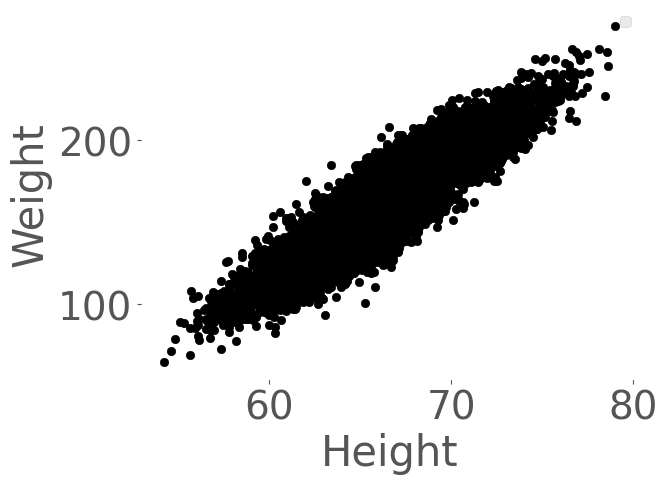

In [16]:
# We observe the tendency that our two variables present with a scatter plot. 
plt.style.use('ggplot')
df = df_height

plt.scatter(df["Height"].values, df["Weight"].values,color="k")
plt.xlabel("Height",fontsize=30)
plt.ylabel("Weight",fontsize=30)
plt.gca().set_facecolor('white')
# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.legend()
plt.show()


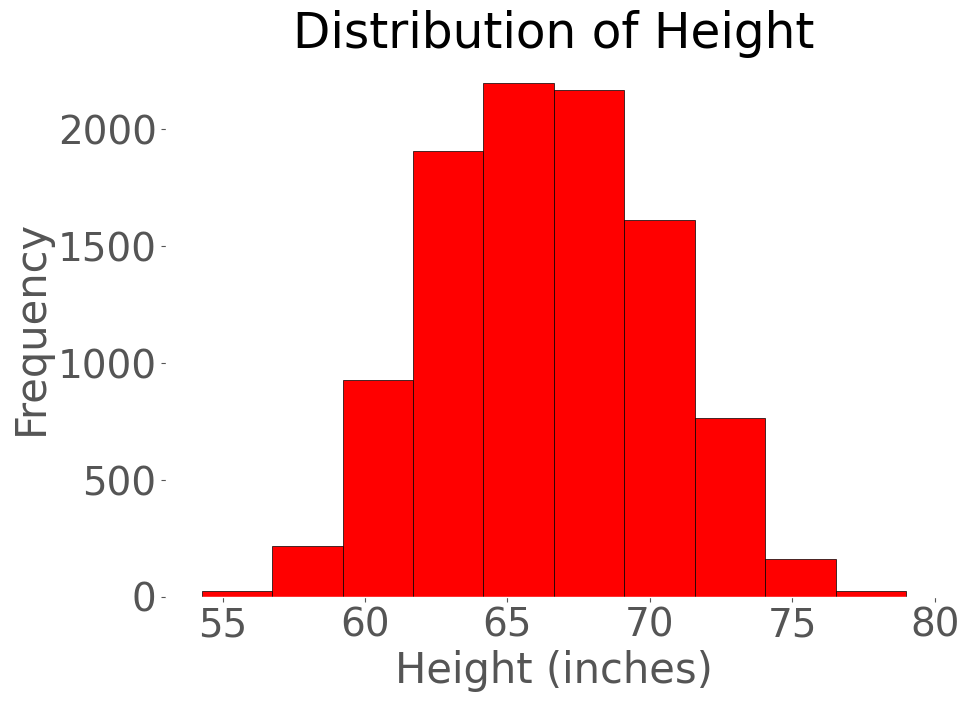

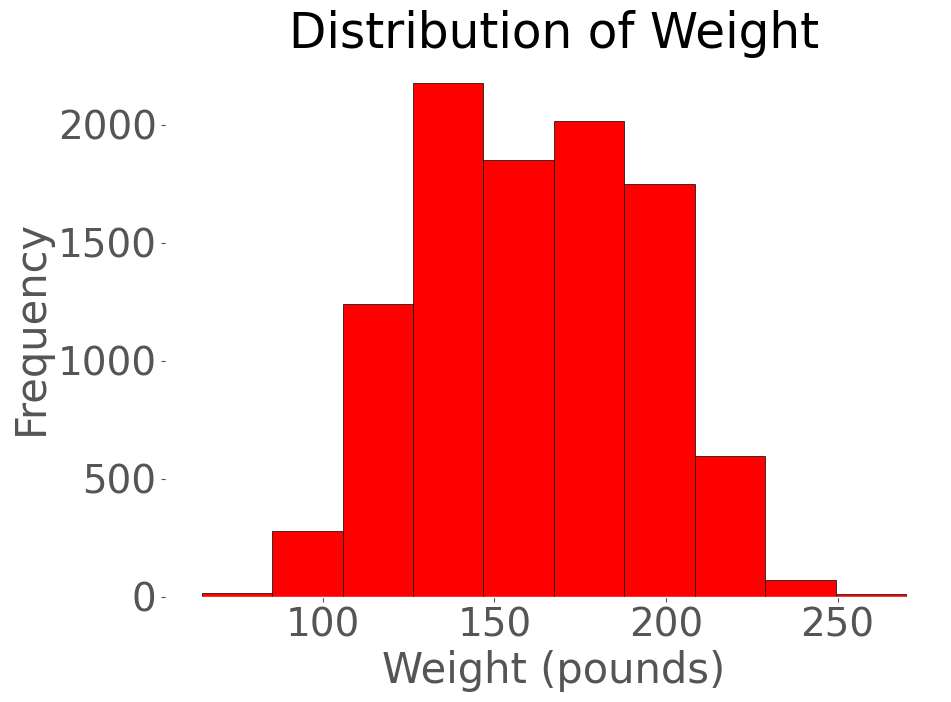

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [17]:
# We check the distribution of both variables. 
plt.style.use('ggplot')
df = df_height


# histogram of the height
df.Height.plot(kind='hist', color='red', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Height', size=35)
plt.xlabel('Height (inches)', size=30)
plt.ylabel('Frequency', size=30)
plt.gca().set_facecolor('white')
# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.show()

plt.figure(figsize=(10, 5))


# histogram of the weight
df.Weight.plot(kind='hist', color='red', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Weight', size=35)
plt.xlabel('Weight (pounds)', size=30)
plt.ylabel('Frequency', size=30);
plt.gca().set_facecolor('white')
# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.show()
plt.figure(figsize=(10, 5))


# OLS

Now we will start with OLS. 
Picture a dart game, but with data points as targets. Our mission? Get as close to these points as possible, minimizing errors for the best fit! 

With OLS we aim to find the values of A and B that minimize the sum of the squared residuals (S).  
To do so, we can easily take its partial derivatives and set them to zero. Solving these two equations is how we obtain a closed mathematical solution.

Simple linear regression OLS: 7.922415418901558 -364.26733650758223


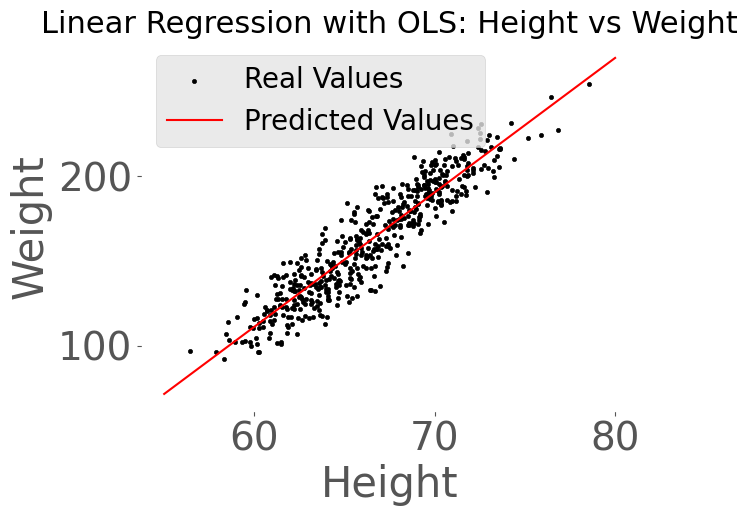

In [18]:
import numpy as np
df = df_height

#df = df[df["Gender"] == "Male"]
df = df.sample(500, replace=False)  # Replace 'n' with the number of rows you want

# Real Values
x = df["Height"].values
y = df["Weight"].values

# mean of our inputs and outputs
x_mean = np.mean(x)
y_mean = np.mean(y)
#total number of values
N = len(x)
# using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(N):
    numerator += (x[i] - x_mean) * (y[i] - y_mean)
    denominator += (x[i] - x_mean) ** 2
    
A = numerator / denominator
B = y_mean - (A * x_mean)
#printing the coefficient
print("Simple linear regression OLS:",A, B)

# Predict and plot
x_values = np.linspace(55, 80, 100)
y_predicted = A * x_values + B

x =  df["Height"].values
y =  df["Weight"].values

#x_male =  df[df["Gender"] == "Male"]["Height"].values
#y_male =  df[df["Gender"] == "Male"]["Weight"].values

#x_female =  df[df["Gender"] == "Female"]["Height"].values
#y_female =  df[df["Gender"] == "Female"]["Weight"].values

plt.title("Linear Regression with OLS: Height vs Weight", fontsize=22)
plt.scatter(x, y, marker='.', label="Real Values", color="k")
#plt.scatter(x_female, y_female, marker='.', label="Real Values - Female")
plt.plot(x_values, y_predicted, "r", label="Predicted Values")
plt.xlabel("Height",fontsize=30)
plt.ylabel("Weight",fontsize=30)
plt.gca().set_facecolor('white')
# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.legend(fontsize=20)
plt.show()

# Gradient DESCENT
Gradient Descent is like finding a valley's lowest point on a hike! 

Iteration 0: MSE = 8.899142876294826
Iteration 100: MSE = 5.964066521800127
Iteration 200: MSE = 5.963538477175336
Iteration 300: MSE = 5.963010499660926
Iteration 400: MSE = 5.962482589248364
Iteration 500: MSE = 5.961954745929129
Iteration 600: MSE = 5.96142696969469
Iteration 700: MSE = 5.960899260536521
Iteration 800: MSE = 5.9603716184461
Iteration 900: MSE = 5.959844043414897
Iteration 1000: MSE = 5.959316535434396
Iteration 1100: MSE = 5.9587890944960735
Iteration 1200: MSE = 5.958261720591404
Iteration 1300: MSE = 5.957734413711876
Iteration 1400: MSE = 5.957207173848964
Iteration 1500: MSE = 5.956680000994155
Iteration 1600: MSE = 5.956152895138932
Iteration 1700: MSE = 5.9556258562747795
Iteration 1800: MSE = 5.955098884393181
Iteration 1900: MSE = 5.95457197948563
Iteration 2000: MSE = 5.9540451415436095
Iteration 2100: MSE = 5.953518370558608
Iteration 2200: MSE = 5.952991666522118
Iteration 2300: MSE = 5.952465029425634
Iteration 2400: MSE = 5.951938459260641
Iteration 250

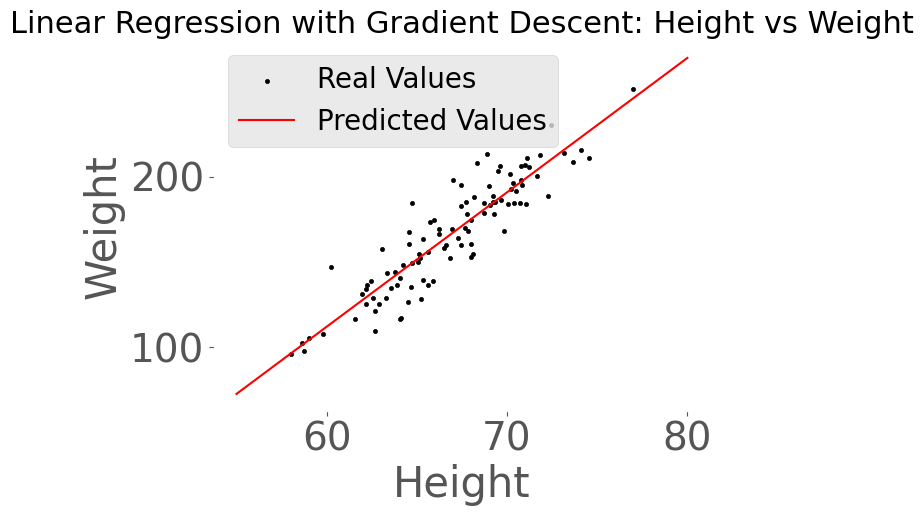

In [19]:
import numpy as np
df = df_height

#df = df[df["Gender"] == "Male"]
df = df.sample(100, replace=False)  # Replace 'n' with the number of rows you want

# Real Values
x = df["Height"].values
y = df["Weight"].values
N = len(x)

# Predict and plot
x_values = np.linspace(55, 80, 1000)

# Function to compute Mean Squared Error
def compute_mse(y_true, y_pred):
    N = len(y_true)
    return np.mean((y_true - y_pred) ** 2)/N

# Function to update m and b using gradient descent
def gradient_descent(x, y, A, B, learning_rate):
    N = len(x)
    y_pred = A * x + B
    dA = -2 * np.sum(x * (y - y_pred)) / N
    dB = -2 * np.sum(y - y_pred) / N
    A -= learning_rate * dA
    B -= learning_rate * dB
    return A, B

# Initialize parameters
A = 0
B = 0
learning_rate = 0.0001
iterations = 10000000

# Gradient Descent
for i in range(iterations):
    A, B = gradient_descent(x, y, A, B, learning_rate)

    if i % 100 == 0:  # Print MSE every 100 iterations
        print(f"Iteration {i}: MSE = {compute_mse(y, A*x + B)}")

# Final parameters
print("Final slope (A):", A)
print("Final intercept (B):", B)

# Predict and plot
x_values = np.linspace(55, 80, 100)
y_predicted = A * x_values + B

x_male =  df[df["Gender"] == "Male"]["Height"].values
y_male =  df[df["Gender"] == "Male"]["Weight"].values

x_female =  df[df["Gender"] == "Female"]["Height"].values
y_female =  df[df["Gender"] == "Female"]["Weight"].values

plt.title("Linear Regression with Gradient Descent: Height vs Weight", fontsize=22)
plt.scatter(x, y, marker='.', label="Real Values", color="k")
#plt.scatter(x_female, y_female, marker='.', label="Real Values - Female")
plt.plot(x_values, y_predicted, "r", label="Predicted Values")
plt.xlabel("Height",fontsize=30)
plt.ylabel("Weight",fontsize=30)
plt.gca().set_facecolor('white')
# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.legend(fontsize=20)
plt.show()


# SK-LEARN

-350.737191812137
[7.71728764]


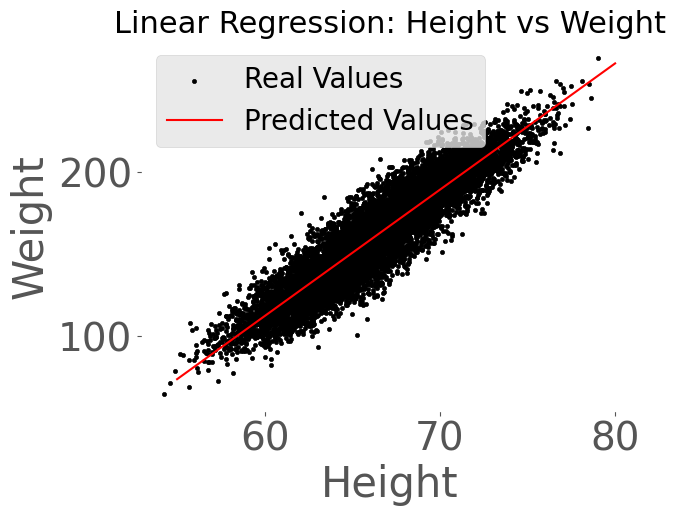

In [20]:
from sklearn.linear_model import LinearRegression

df = df_height


# create linear regression object
lr = LinearRegression()

# fit linear regression
lr.fit(df[['Height']], df['Weight'])

x_values = np.linspace(55,80,100)
y_predicted = lr.coef_*x_values + lr.intercept_

# get the slope and intercept of the line best fit
print(lr.intercept_)

print(lr.coef_)

# Real Values
x = df["Height"].values
y = df["Weight"].values

plt.title("Linear Regression: Height vs Weight", fontsize=22)
plt.scatter(x, y, marker='.', label="Real Values", color="k")
#plt.scatter(x_female, y_female, marker='.', label="Real Values - Female")
plt.plot(x_values, y_predicted, "r", label="Predicted Values")
plt.xlabel("Height",fontsize=30)
plt.ylabel("Weight",fontsize=30)
plt.gca().set_facecolor('white')
# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.legend(fontsize=20)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


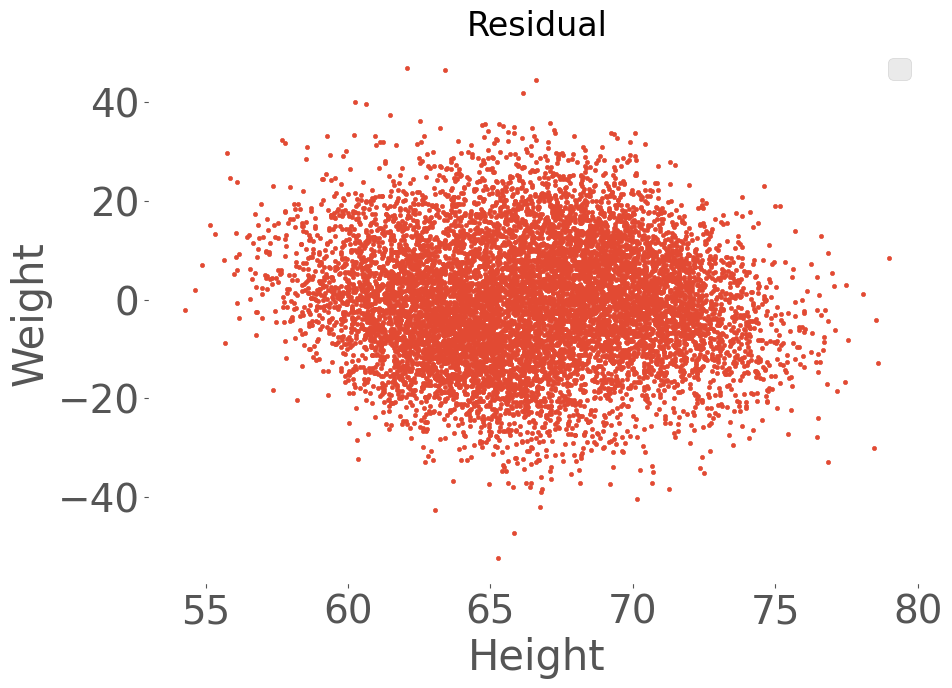

In [21]:
df["Weight"].values - (A*x + B)

# residual plot 500 females
fig = plt.figure(figsize = (10, 7))
plt.title('Residual', size=24)
plt.scatter(df["Height"].values, df["Weight"].values - (A*x + B), marker=".")
plt.xlabel("Height",fontsize=30)
plt.ylabel("Weight",fontsize=30)
plt.gca().set_facecolor('white')
# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.legend(fontsize=20)
plt.show()


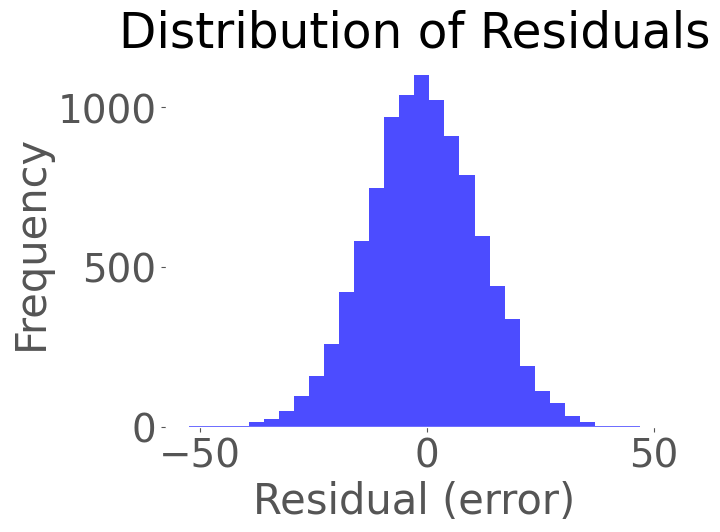

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [22]:
plt.hist(df["Weight"].values - (A*x + B), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Residuals', size=35)
plt.xlabel('Residual (error)', size=30)
plt.ylabel('Frequency', size=30)
plt.gca().set_facecolor('white')
# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.show()

plt.figure(figsize=(10, 5))


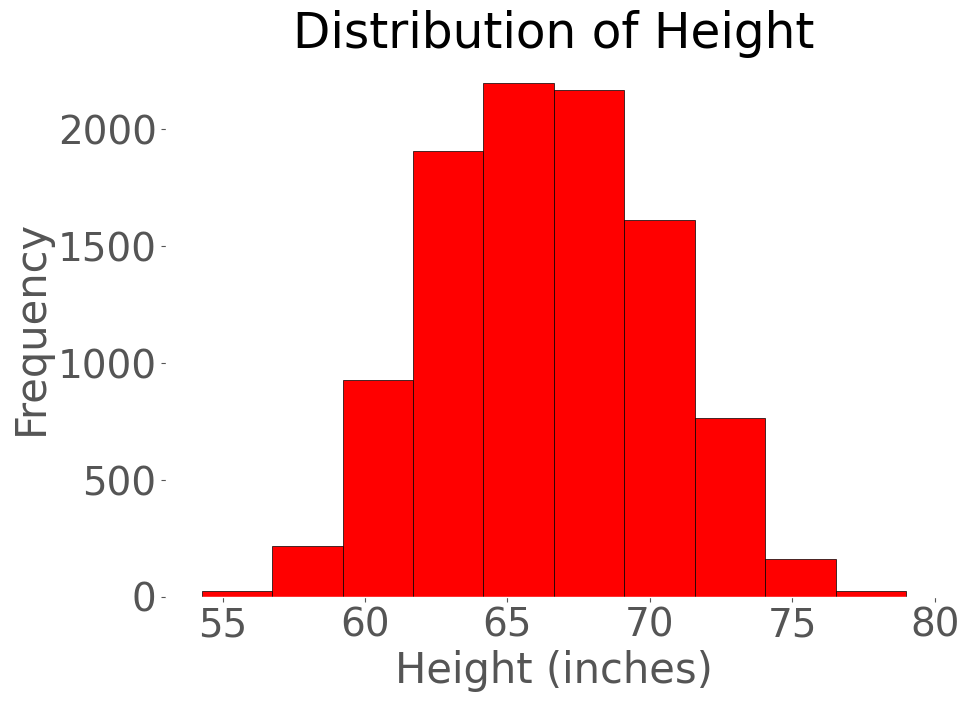

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [23]:
plt.style.use('ggplot')
df = df_height


# histogram of the residuals
df.Height.plot(kind='hist', color='red', edgecolor='black', figsize=(10,7))

plt.title('Distribution of Height', size=35)
plt.xlabel('Height (inches)', size=30)
plt.ylabel('Frequency', size=30)
plt.gca().set_facecolor('white')
# Change the label size for both axes
plt.gca().tick_params(axis='both', which='major', labelsize=28)
plt.show()

plt.figure(figsize=(10, 5))



# Multiple Linear Regression
To explain in the comming days...